In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]
import matplotlib.image as mpimg
import time
import random
from IPython.display import display, Image, HTML

In [2]:
rules = {}
# pairs
rules[(2, 2)] = ['split', 'split','split','split','split', 'split', 'hit','hit','hit','hit']
rules[(3, 3)] = rules[(2, 2)]
rules[(4, 4)] = ['hit', 'hit','hit','split','split', 'hit','hit','hit','hit', 'hit']
rules[(5, 5)] = ['double','double','double','double','double','double','double','double','hit','hit']
rules[(6, 6)] = ['split', 'split','split','split','split', 'hit','hit','hit','hit', 'hit']
rules[(7, 7)] = ['split', 'split','split','split','split', 'split','hit','hit','hit', 'hit']
rules[(8, 8)] = ['split', 'split','split','split','split', 'split', 'split','split','split','split']
rules[(9, 9)] = ['split', 'split','split','split','split', 'stand', 'split','split','stand','stand']
rules[(10, 10)] = ['stand','stand','stand','stand','stand','stand','stand','stand','stand','stand']
rules[(1, 1)] = rules[(8, 8)]

# Ace in hand
rules[(1, 2)] = ['hit','hit','hit','double','double','hit','hit','hit','hit','hit']
rules[(1, 3)] = rules[(1, 2)]
rules[(1, 4)] = ['hit','hit','double','double','double','hit','hit','hit','hit','hit']
rules[(1, 5)] = rules[(1, 4)]
rules[(1, 6)] = ['hit','double','double','double','double','hit','hit','hit','hit','hit']
rules[(1, 7)] = ['stand','double','double','double','double','stand','stand','hit','hit','hit']

for i in range(8, 11):
    rules[(1, i)] = rules[(10, 10)]

# Sum of hand
for i in range(5, 9):
    rules[i] = ['hit','hit','hit','hit','hit','hit','hit','hit','hit','hit']

rules[9] = rules[(1, 6)]
rules[10] = rules[(5, 5)]
rules[11] = ['double','double','double','double','double','double','double','double','double','hit']
rules[12] = ['hit','hit','stand','stand','stand','hit','hit','hit','hit','hit']
for i in range(13, 17):
    rules[i] = ['stand','stand','stand','stand','stand','hit','hit','hit','hit','hit']
    
for i in range(17, 22):
    rules[i] = rules[(10, 10)]

In [4]:
class Deck:
    def __init__(self, n_cards, cut_pen = 1.):
        self.n_cards = n_cards
        self.sorted_cards = int(np.ceil(n_cards/52.))*(4*range(1,10) + [10]*16)
        self.cards = self.sorted_cards
        random.shuffle(self.cards)
        self.cards = self.cards[0:self.n_cards]
        self.discard_cards = []
        self.inplay_cards = []
        
    def shuffle(self):
        random.shuffle(self.cards)

    def take_cards(self, number):
        cards = self.cards[0:number]
        self.inplay_cards += cards
        self.cards = self.cards[number:]
        return cards

    def discard_in_play(self):
        self.discard_cards += self.inplay_cards
        self.inplay_cards = []
        
    def get_count(self):
        values = []
        for i, card in enumerate(self.discard_cards + self.inplay_cards):
            if card in [1, 10]:
                values.append(-1)
            elif card in [7, 8, 9]:
                values.append(0)
            elif card in [2, 3, 4, 5, 6]:
                values.append(+1)
        return np.sum(values)
    
    def get_true_count(self):
        true_count = self.get_count()/float(len(self.cards)/52.)
        return true_count


def is_bj(cards):
    if cards[0] ==1 and cards[1] == 10:
        return True
    elif cards[1] ==1 and cards[0] == 10:
        return True
    else:
        return False
 
def get_score(hand):
    hand = hand[:]
    scores = []
    scores.append(np.sum(hand))

    while 1 in hand:
        for i, card in enumerate(hand):
            if card == 1:
                hand[i] = 11
                scores.append(np.sum(hand))
                break
    scores = filter(lambda x: x <= 21, scores)
    try:
        return max(scores)
    except:
        return 'bust'
    
def play_bj_hand(deck):
    player_hand = deck.take_cards(2)
    dealer_hand = deck.take_cards(2)
    return player_hand, dealer_hand, deck

def check_for_split(hand, upcard):
    if hand[0] == hand[1]:
        if hand[0] in [8, 1]:
            return True
        else:
            return False
        
def check_for_double(hand, upcard):
    if np.sum(hand) == 11:
        return True
    if upcard in [2, 3, 4, 5, 6]:
        if np.sum(hand) in [7, 8, 9, 10]:
            return True
    else:
        return False
    

def get_move(hand, upcard):
    if (hand[0] == hand[1]) or (1 in hand):
        rule_list = rules[tuple(sorted(hand))]
    else:
        rule_list = rules[np.sum(hand)]
    if upcard == 1:
        return rule_list[-1]
    else:
        return rule_list[upcard - 2]    
    
def play_out_hand(hand, upcard, deck):
    move = get_move(hand, upcard)
    hands = []

    if move == 'split':
        hand1 = [hand[1], deck.take_cards(1)]
        hand2 = [hand[0], deck.take_cards(1)]
    else:
        check_for_splits == False
        
    if move == 'hit':
        hand += deck.take_cards(1)
        if np.sum(hand) > 21:
            hands.append(hand)
            return hands
        else:
            play_out_hand(hand, upcard, deck)
    if move == 'double':
        hand += deck.take_cards(1)
        if np.sum(hand) > 21:
            hands.append(hand)
            return hands
        play_out_hand(hand, upcard, deck)
        
    if move == 'stand':
        hands.append(hand)
        return hands

def breakout_ace_hands(hand):
    scores = []
    while 1 in hand:
        for i, card in enumerate(hand):
            if card == 1:
                hand[i] = 11
                if np.sum(hand) <= 21:
                    scores.append(np.sum(hand))
                break
    scores = filter(lambda x: x <= 21, scores)
    return scores

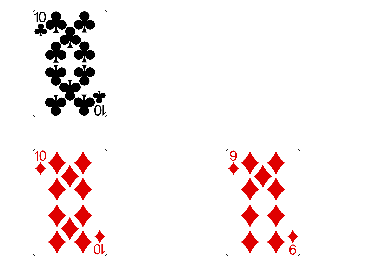

Press Enter to continue... 


stand


In [5]:
suits = ['spades', 'hearts', 'clubs', 'diamonds']

deck = Deck(6*52)
ph = deck.take_cards(2)
uc = deck.take_cards(1)[0]
#print(ph)
move = get_move(ph, uc)
def get_card_name(card):
    if card == 1:
        card_name = 'ace'
    else:
        card_name = str(card)
    return card_name

uc_image_path = './card_images/PNG-cards-1.3/' + get_card_name(uc) + '_of_'+ random.choice(suits) +'.png'
pc_1_image_path = './card_images/PNG-cards-1.3/' + get_card_name(ph[0]) + '_of_'+ random.choice(suits) +'.png'
pc_2_image_path = './card_images/PNG-cards-1.3/' + get_card_name(ph[1]) + '_of_'+ random.choice(suits) +'.png'

uc_image = mpimg.imread(uc_image_path)
pc_1_image = mpimg.imread(pc_1_image_path)
pc_2_image = mpimg.imread(pc_2_image_path)

fig, ax = plt.subplots(2, 2)
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
ax[0, 0].imshow(uc_image);
ax[0, 0].axis('off')
ax[0, 1].axis('off')
ax[1, 0].imshow(pc_1_image);
ax[1, 0].axis('off')
ax[1, 1].imshow(pc_2_image);
ax[1, 1].axis('off')
plt.tight_layout()
plt.show()

raw_input("Press Enter to continue...")
print(move)

In [102]:
num_games = []
for j in range(5000):
    i = 0
    while True:
        i += 1
        D1 = Deck(52)
        if is_bj(D1.cards[0:2]):
            num_games.append(i)
            break


# should be 4.826%

20.8938
0.04786108797825193


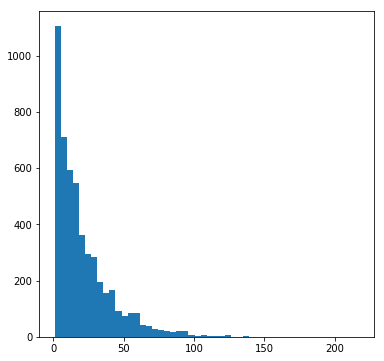

In [103]:
print(np.mean(num_games))
print(1/np.mean(num_games))
a = plt.hist(num_games, 50)

In [ ]:
def simulate_rounds(number_of_hands=500, number_of_sims=50, money=5000,
                    min_bet=5, max_bet=5000, count_leverage=1.0, n_decks=6,
                    counting_cards=True, bj_payout=3/2., penetration = 25, count_advantage=4.0):
    money_lists = np.zeros(number_of_hands)
    init_money = money
    for j in range(number_of_sims):
        money = init_money
        money_list = []
        ev_list = []
        deck = Deck(n_decks*52)
        for i in range(number_of_hands):
            if len(deck.cards) < penetration:
                deck = Deck(n_decks*52)
            true_count = deck.get_true_count()
            ev_list.append(true_count)

            if (true_count >= count_advantage) and (counting_cards):
                bet_size = count_leverage*min_bet*true_count
                if bet_size > max_bet:
                    bet_size = max_bet
            else:
                bet_size = min_bet

            ph = deck.take_cards(2)
            dh = deck.take_cards(2)

            ds = get_score(dh)
            ps = get_score(ph)

            move = get_move(ph, dh[0])
            while move != 'stand':
                if move == 'hit':
                    ph += deck.take_cards(1)
                    if ph > 21:
                        move = 'stand'
                    else:
                        move = get_move(ph, dh[0])
                if move == 'double':
                    ph += deck.take_cards(1)
                    bet_size = 2*bet_size
                    if ph > 21:
                        move = 'stand'
                    else:
                        move = get_move(ph, dh[0])
                if move == 'split':
                    ph += deck.take_cards(1)        
                    if ph > 21:
                        move = 'stand'
                    else:
                        move = get_move(ph, dh[0])

            while get_score(dh) < 17:
                dh += deck.take_cards(1)

            ds = get_score(dh)
            ps = get_score(ph)

            if money <= 0:
                money_list.append(0)  
            elif (is_bj(dh) and is_bj(ph)):
                money += 0
                money_list.append(money)
            elif is_bj(dh):
                if not is_bj(ph):
                    money -= bet_size
                    money_list.append(money)
            elif is_bj(ph):
                if not is_bj(dh):
                    money += bet_size*bj_payout
                    money_list.append(money)
            elif ps =='bust':
                money -= bet_size
                money_list.append(money)
            elif ds == 'bust':
                money += bet_size
                money_list.append(money)
            elif ps > ds:
                money += bet_size
                money_list.append(money)
            elif ds > ps:
                money -= bet_size
                money_list.append(money)
            elif ds == ps:
                money_list.append(money)
            else:
                money_list.append(money)
        money_lists += np.array(money_list)
    return money_lists/number_of_sims


plt.plot(simulate_rounds(number_of_hands = 1000, number_of_sims=100,
                         counting_cards=True, count_advantage = 3.0, n_decks=6, count_leverage=10000.))
plt.plot(simulate_rounds(number_of_hands = 1000, number_of_sims=100,
                         counting_cards=False))

In [5]:
D1 = Deck(6*52)
D1.take_cards(10)
print(D1.get_true_count())
print(D1.inplay_cards)

-0.17218543046357618
[8, 10, 7, 10, 6, 2, 7, 7, 10, 8]


In [17]:
ph = D1.take_cards(2)
print(ph)
uc = D1.take_cards(1)[0]
print(uc)
final_cards = play_out_hand(deck=D1, hand=ph, upcard=uc)
print(final_cards)

[1, 7]
9


KeyError: (1, 7, 10)